# Umbralisación
En pruebas anteriores se logró encontrar que la matriz Cr tiene buenos resultados para separar las señales de transito negras y amarillas del resto. Un umbral fijo de 140 logró reconocer las señales de tránsito. Ahora se realizarán algunas mejoras para mejorar la umbralisación. A continuación se pueden apreciar las imagenes que se usarán para este proceso

In [2]:
#importación de librerías
import cv2     #Librería OpenCV
from IPython.display import Image   #Libreria impresión de imagenes
import numpy as np                  #Importación numpy
from matplotlib import pyplot as plt  #Impresión de gráficas

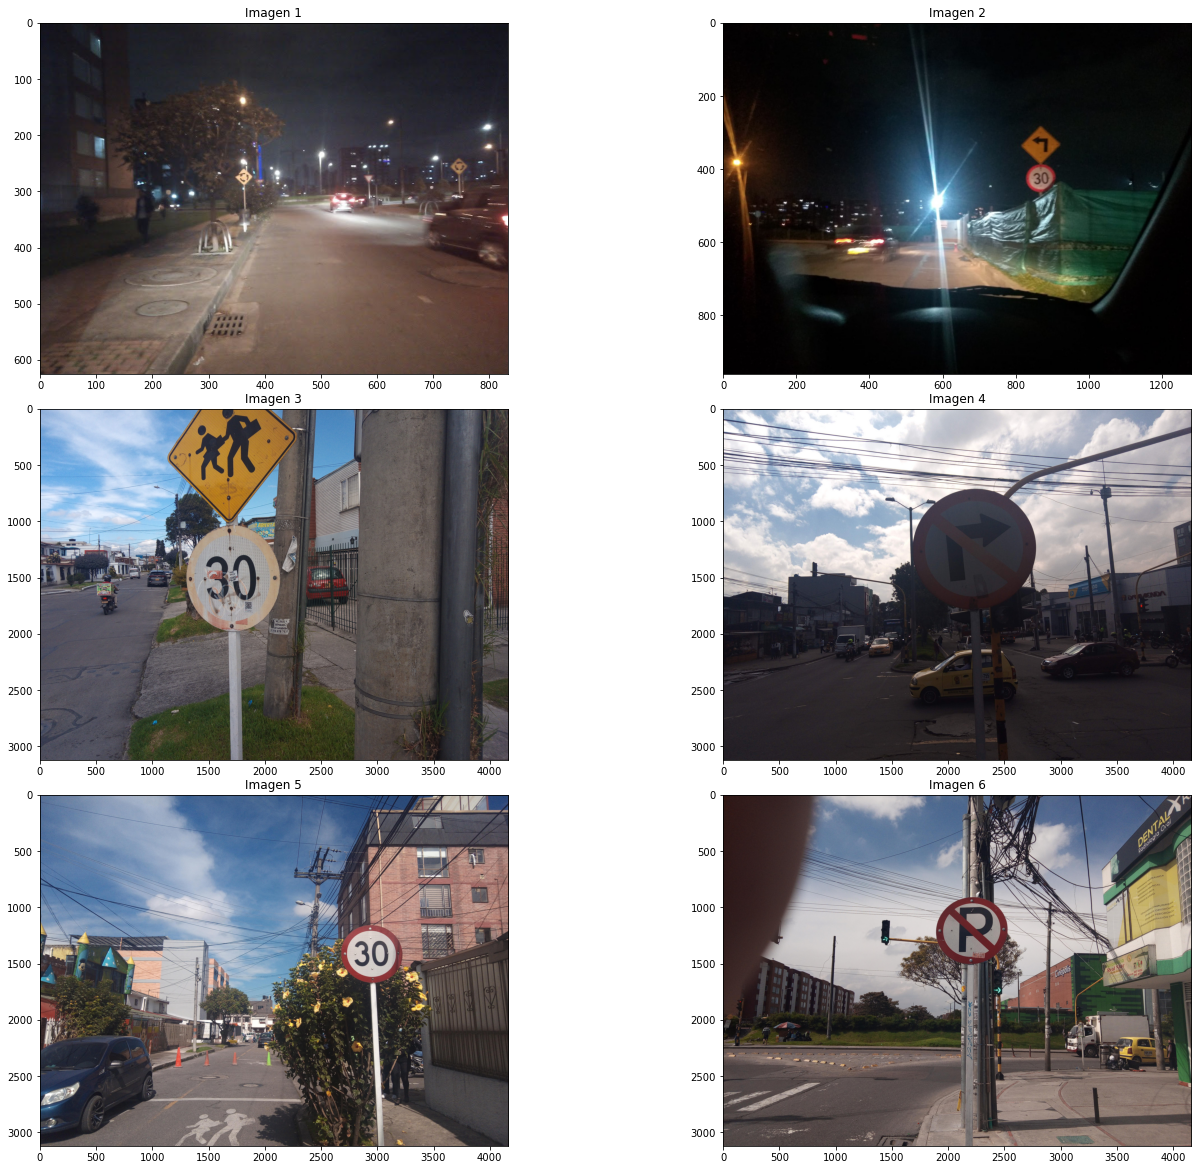

In [10]:
#lectura de las imágenes
ima1=cv2.imread("ima3.jpeg")
ima2=cv2.imread("ima6.jpeg")
ima3=cv2.imread("ima7.jpg")
ima4=cv2.imread("ima8.jpg")
ima5=cv2.imread("ima9.jpg")
ima6=cv2.imread("ima10.jpg")
#conversión de las imágenes de BGR a RGB
ima1=cv2.cvtColor(ima1,cv2.COLOR_BGR2RGB)
ima2=cv2.cvtColor(ima2,cv2.COLOR_BGR2RGB)
ima3=cv2.cvtColor(ima3,cv2.COLOR_BGR2RGB)
ima4=cv2.cvtColor(ima4,cv2.COLOR_BGR2RGB)
ima5=cv2.cvtColor(ima5,cv2.COLOR_BGR2RGB)
ima6=cv2.cvtColor(ima6,cv2.COLOR_BGR2RGB)
#se imprimen las imágenes para verificar correcto funcionamiento
plt.figure(1);
plt.subplot(3,2,1);plt.imshow(ima1),plt.title('Imagen 1')
plt.subplot(3,2,2);plt.imshow(ima2),plt.title('Imagen 2')
plt.subplot(3,2,3);plt.imshow(ima3),plt.title('Imagen 3')
plt.subplot(3,2,4);plt.imshow(ima4),plt.title('Imagen 4')
plt.subplot(3,2,5);plt.imshow(ima5),plt.title('Imagen 5')
plt.subplot(3,2,6);plt.imshow(ima6),plt.title('Imagen 6')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

# Umbralisación Fija sin tratamiento de la señal

In [96]:
def umb_fija(imagen,umbral):
    imagen=cv2.cvtColor(imagen,cv2.COLOR_RGB2YCrCb)
    Y,Cr,Cb = cv2.split(imagen)
    plt.figure()
    plt.subplot(1,2,1);plt.imshow(Cr,cmap='gray', vmin=0, vmax=255),plt.title('Imagen canal Cr'),plt.xticks([]), plt.yticks([]);
    #Cálculo de histogramas
    hist = cv2.calcHist(Cr, [0], None, [256], [0, 255])
    cv2.normalize(hist,hist,alpha=0,beta=1,norm_type=cv2.NORM_MINMAX)
    plt.subplot(1,2,2);plt.plot(hist, color='red'),plt.title('Histograma')
    
    ret, mask = cv2.threshold(Cr,umbral,255,cv2.THRESH_BINARY)
    ima= cv2.bitwise_and(Cr,mask)
    plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)
    
    plt.figure()
    plt.subplot(1,2,1);plt.imshow(ima,cmap='Reds'),plt.title('Imagen canal Cr ROI'),plt.xticks([]), plt.yticks([]);
    #Cálculo de histogramas
    hist = cv2.calcHist(Cr, [0], None, [50], [umbral,255])
    #cv2.normalize(hist,hist,alpha=0,beta=1,norm_type=cv2.NORM_MINMAX)
    plt.subplot(1,2,2);plt.plot(hist, color='red'),plt.title('Histograma ROI')
    plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

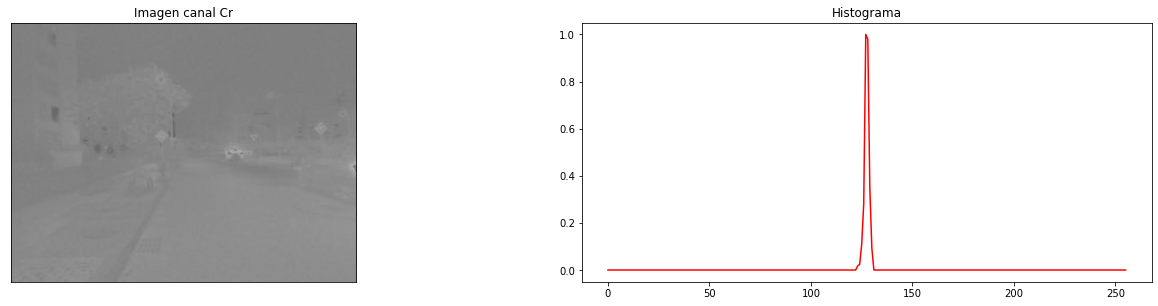

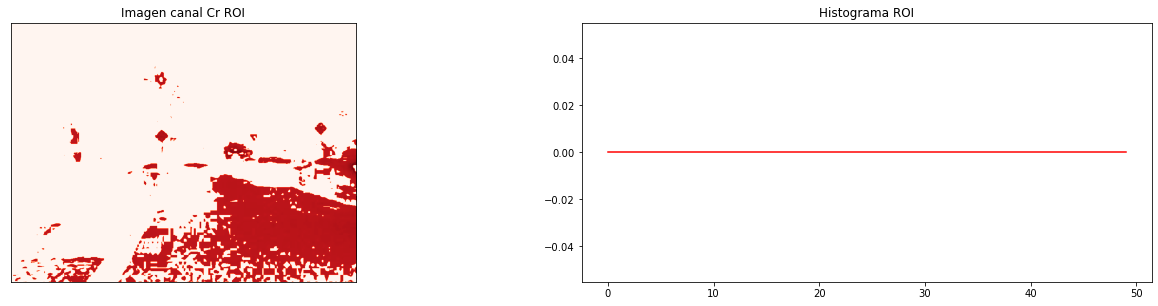

In [110]:
umb_fija(ima1,140)

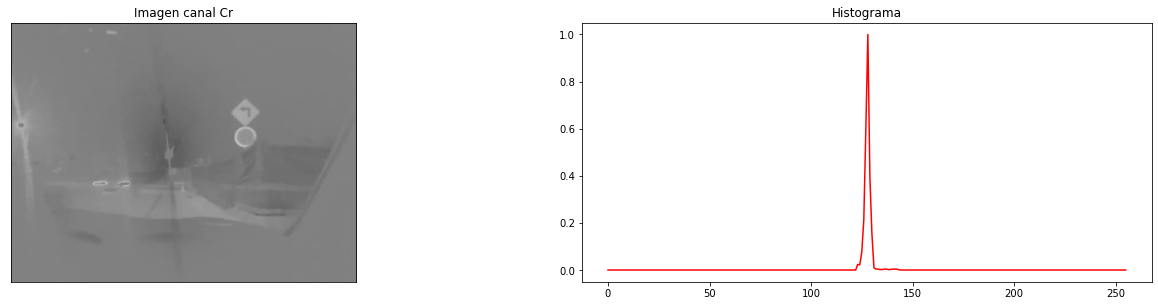

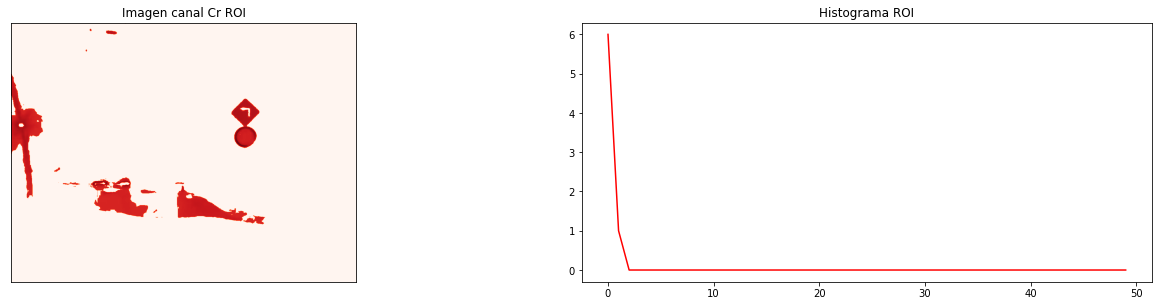

In [111]:
umb_fija(ima2,140)

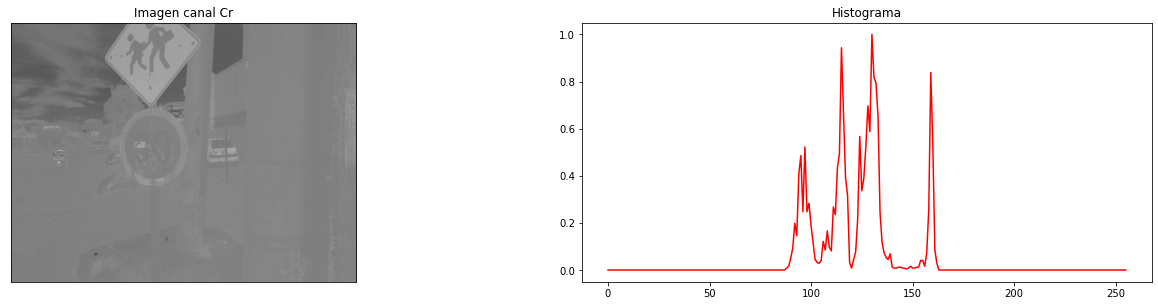

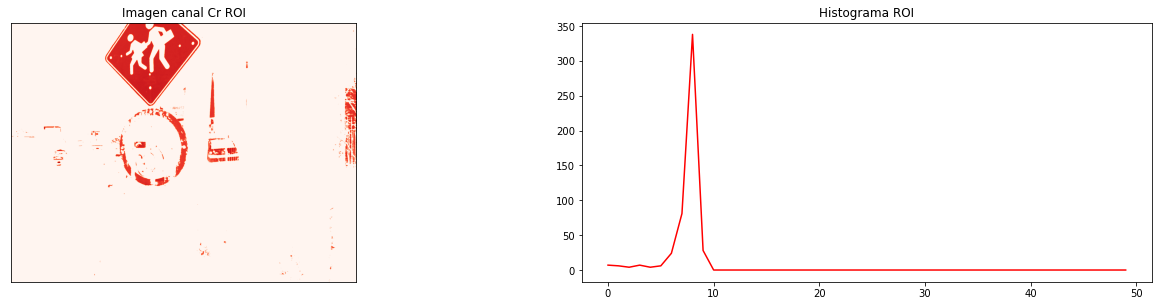

In [112]:
umb_fija(ima3,140)

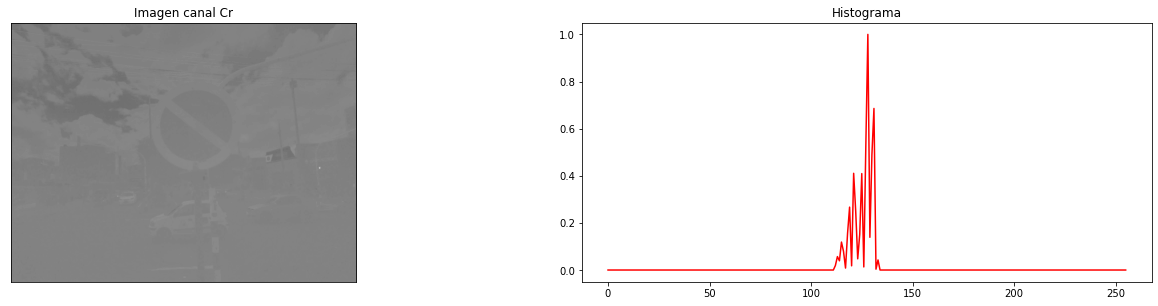

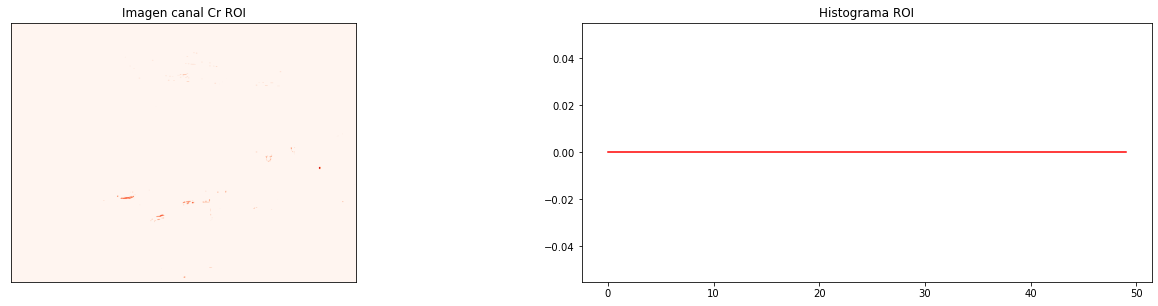

In [113]:
umb_fija(ima4,140)

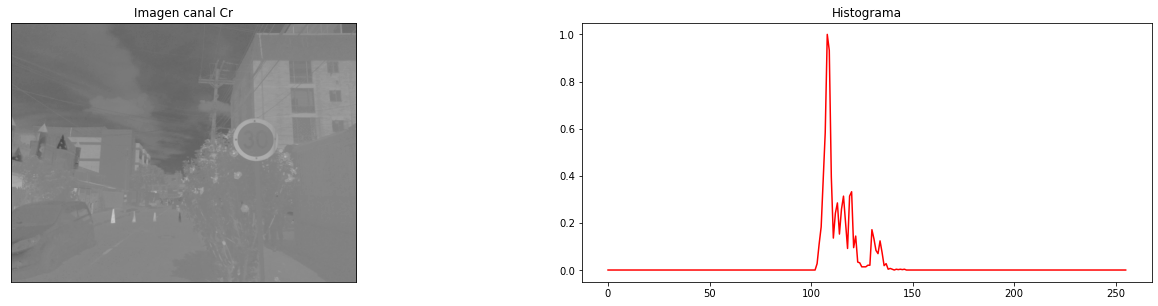

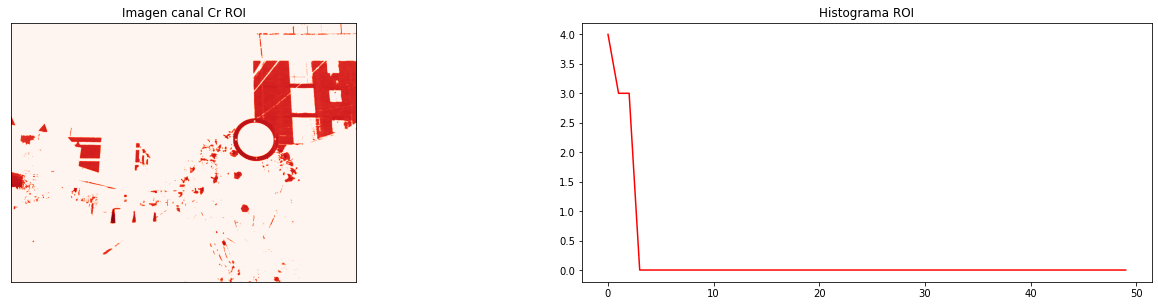

In [114]:
umb_fija(ima5,140)

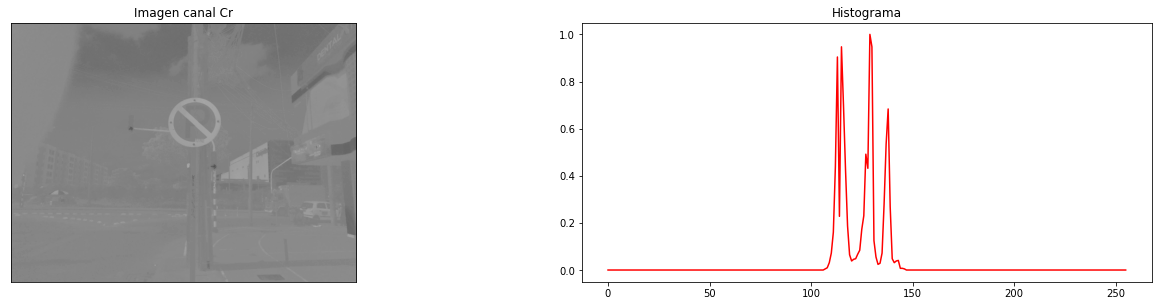

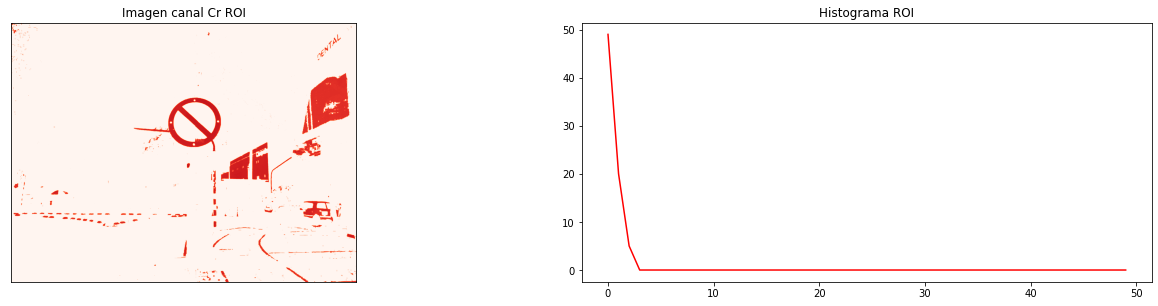

In [115]:
umb_fija(ima6,140)

## Filtrado de imágenes previo

## Filtro Promedio

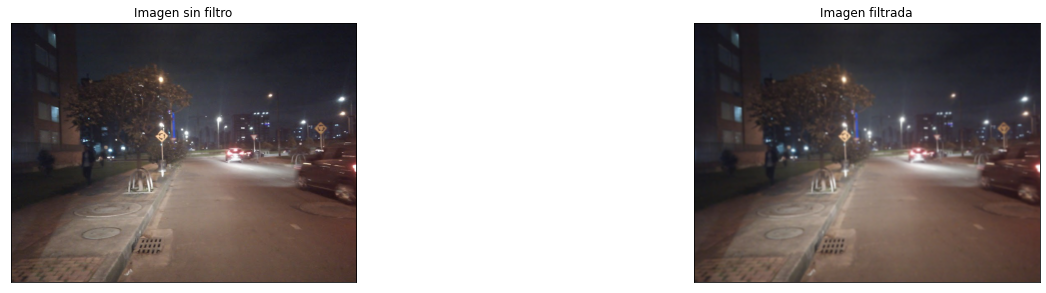

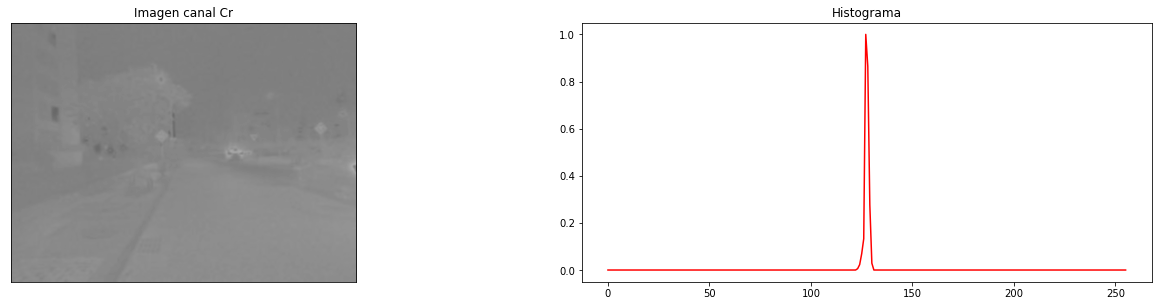

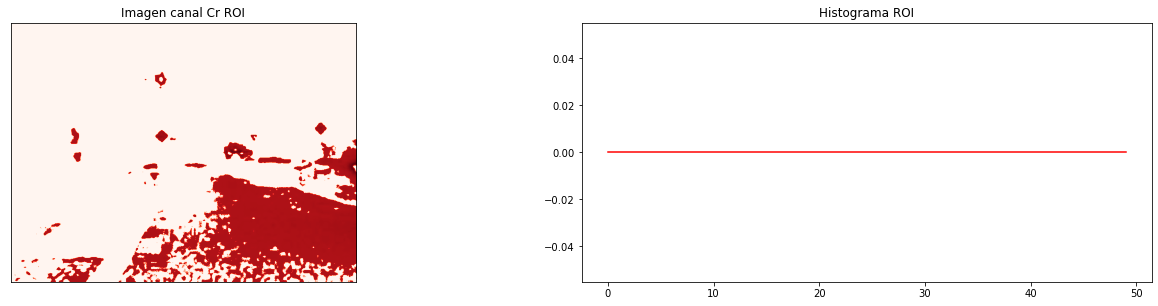

In [120]:
ima11 = cv2.blur(ima1,(5,5)) #promediado
plt.figure();
plt.subplot(1,2,1);plt.imshow(ima1),plt.title('Imagen sin filtro'),plt.xticks([]), plt.yticks([]);
plt.subplot(1,2,2);plt.imshow(ima11),plt.title('Imagen filtrada'),plt.xticks([]), plt.yticks([]);
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)
umb_fija(ima11,140)